# Practice Session 06: Network models


Author: Alejandro Duarte Whitehair DeZerne

E-mail: alejandroduarte.whitehair01@estudiant.upf.edu

Date: 4/11/2025

# 1. Random (ER) graph generator

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools

from collections import OrderedDict

The following function, which you can leave as-is, will be useful. It returns `True` with probability *p*, and `False` with probability *1-p*:

In [25]:
# Leave as-is

def flip_coin(p):
    if np.random.random() < p:
        return True
    else:
        return False

## 1.1. Generate ER graph

Write function `generate_random_graph(N, p)`, that:

1. Creates an empty graph
1. Adds N nodes to this graph, numbered from *0* to *N-1*
1. For each pair *(u,v)* of nodes:
   1. With probability *p*, adds an edge between *u* and *v*
1. Returns the graph

Small graphs can be easily created programmatically in Python with NetworkX.

* To create a graph, you use either `networkx.Graph` or `networkx.DiGraph`, which return an undirected an directed graph respectively.
* To add a node to a graph *g*, you use `g.add_node(u)`, where *u* is the name of the node.
* To add an edge to a graph *g*, you use `g.add_edge(u, v)`, where *u* is the name of the source of the edge, and *v* the name of the destination of the edge.

Example:

```python
g = nx.Graph()
g.add_node(0)
g.add_node(1)
g.add_edge(0, 1)
```

To generate all pairs of nodes, use:

```
for u, v in itertools.combinations(G.nodes, 2):
    ...
```

In [26]:
def generate_random_graph(n, p):
    nodes = n  # number of nodes
    probability = p # P of edge creation

    # create empty graph
    G = nx.Graph()
    G.add_nodes_from(range(nodes))

    # Iterate over all possible pairs of nodes
    for u, v in itertools.combinations(G.nodes, 2):
        if flip_coin(probability):
            G.add_edge(u, v)

    return G


Write code to check whether your generator produces the correct number of edges. Generate *1000* graphs with a number of nodes *N* and connection probability *p* chosen by you, and keep track of the number of edges in the graph. Compare this visually against the number of expected edges.


In [27]:
n = 10  # number of nodes
p = 0.3 # P of edge creation
observed_edges = []

for i in range(1000):
    G = generate_random_graph(n, p)
    observed_edges.append(G.number_of_edges())

The following compares visually the number of expected edges, which you should calculate as ``expected_edges``, with the number of actual edges.


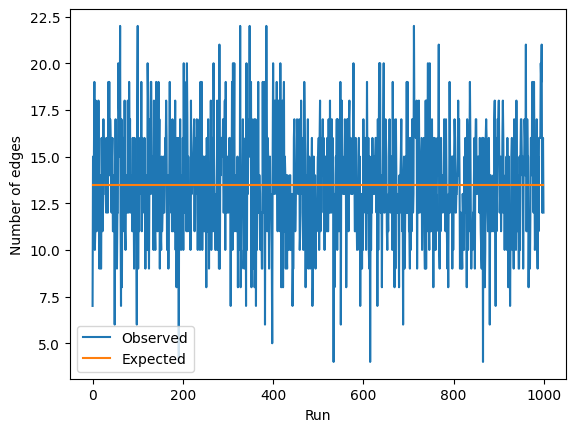

In [28]:
expected_edges = p * (n * (n - 1)) / 2
trials = 1000

# Leave as-is

plt.xlabel("Run")
plt.ylabel("Number of edges")
plt.plot(range(trials), observed_edges, label="Observed")
plt.plot(range(trials), [expected_edges] * trials, label="Expected")
plt.legend()
plt.show()

Create a new generator, `generate_random_graph_avg_degree(N, kavg)` that given a target number of nodes, and a target average degree, determines the appropriate value of `p` to call `generate_random_graph(N, p)`, using the formulas seen in class.


In [29]:
def generate_random_graph_avg_degree(N, kavg):
    p = kavg / (N - 1)
    return generate_random_graph(N, p)


Test your new generator. First, write a function ``graph_average_degree`` that returns the average degree of a graph.

Then, generate a series of graphs with a number of nodes *N=500* of your choice and expected average degree between 0.0 and 3.0 in increments of 0.1. The observed average degree of the resulting graph should be close to the given average degree.


In [30]:
def graph_average_degree(g):
    degrees = [d for n, d in g.degree()]
    return np.mean(degrees)

target_average_degrees = []
observed_average_degrees = []

k = 0
while k <= 3:
    g = generate_random_graph_avg_degree(500, 0.1*k)

    avg_degree = graph_average_degree(g)
    target_average_degrees.append(0.1*k)
    observed_average_degrees.append(avg_degree)
    print(f"Target avg degree: {0.1*k:.2f}, Observed avg degree: {avg_degree:.2f}")

    k += 0.1


Target avg degree: 0.00, Observed avg degree: 0.00
Target avg degree: 0.01, Observed avg degree: 0.01
Target avg degree: 0.02, Observed avg degree: 0.02
Target avg degree: 0.03, Observed avg degree: 0.04
Target avg degree: 0.04, Observed avg degree: 0.04
Target avg degree: 0.05, Observed avg degree: 0.06
Target avg degree: 0.06, Observed avg degree: 0.05
Target avg degree: 0.07, Observed avg degree: 0.08
Target avg degree: 0.08, Observed avg degree: 0.10
Target avg degree: 0.09, Observed avg degree: 0.11
Target avg degree: 0.10, Observed avg degree: 0.09
Target avg degree: 0.11, Observed avg degree: 0.10
Target avg degree: 0.12, Observed avg degree: 0.16
Target avg degree: 0.13, Observed avg degree: 0.14
Target avg degree: 0.14, Observed avg degree: 0.16
Target avg degree: 0.15, Observed avg degree: 0.17
Target avg degree: 0.16, Observed avg degree: 0.20
Target avg degree: 0.17, Observed avg degree: 0.18
Target avg degree: 0.18, Observed avg degree: 0.20
Target avg degree: 0.19, Observ

The following compares visually the given average degree with the observed average degree.


/var/folders/bp/zf8ns2wn71x8xwtxqymmmzw00000gn/T/ipykernel_4013/1970829798.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


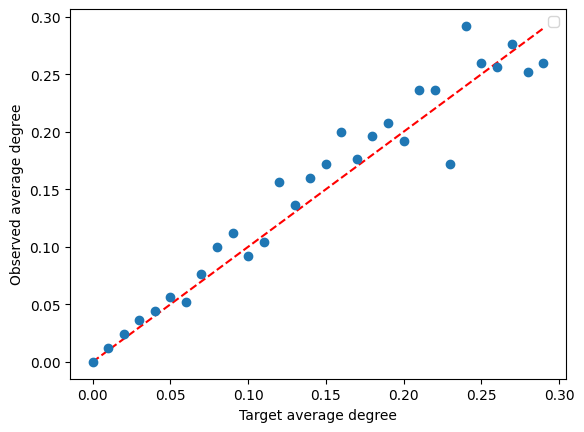

In [31]:
# Leave as-is

#!! Be careful make sure to run the previous cell just before running this one as we will be using some of the variables later and it can cause issues

plt.xlabel("Target average degree")
plt.ylabel("Observed average degree")
plt.scatter(target_average_degrees, observed_average_degrees)
plt.plot([0,max(target_average_degrees)], [0,max(target_average_degrees)], 'r--', zorder= 0)
plt.legend()
plt.show()

## 1.2. Measure connectivity


Create a function `is_connected(g)` that given a graph, answers True if the graph is connected, False otherwise. Do not use the built-in `is_connected` function of NetworkX, but feel free to use the function `nx.has_path(g, source, target)`.

Use the `itertools.combinations(G.nodes, 2)` function described above.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [32]:
def is_connected(g):  
    for combination in itertools.combinations(g.nodes, 2): # here i go through all possible combinations of node pairs as tuples produced by the itertools.combinations function
        if not nx.has_path(g, combination[0], combination[1]):  # here i check if theres a path (or rather if there isnt)
            return False # return false if any pair of nodes isnt connected
    return True # otherwise return true

is_connected(generate_random_graph_avg_degree(10, 2)) # test


False

The following code, which you should leave as-is, returns the size of the largest connected component on a graph.


In [33]:
# Leave as-is

def size_largest_cc(G):

    # Obtain the list of connected components of the graph sorted from largest to smallest
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)

    # Selects the first connected component in that list
    G0 = G.subgraph(Gcc[0])

    # Returns its number of nodes
    return G0.number_of_nodes()

Create a series of ER graphs having *N=1000* nodes and target average degree  between *0.2* and *2.0* (e.g. *0.2, ..., 2.0*) with step *0.05* . Record: (1) their observed average degrees and (2) the size of their largest connected component as a fraction of the total number of nodes.

You can use the following skeleton:

```python
N = 1000
target_average_degrees = np.arange(0.2, 2.0, 0.05)

largest_cc_sizes = []
average_degrees = []

for target_average_degree in target_average_degrees:
    
    # Generate graph
    g = generate_random_graph_avg_degree(N, target_average_degree)
    assert g.number_of_nodes() == N, "Wrong number of nodes"
    
    # Obtain observed average degree
    average_degree = # YOUR CODE HERE
    average_degrees.append(average_degree)
    
    # Obtain size of largest connected component as a fraction of the total number of nodes
    largest_cc_size = # YOUR CODE HERE
    largest_cc_sizes.append(largest_cc_size)
```

Then, create a scatter plot of *average_degrees* (x axis) and *largest_cc_sizes* (y axis). Remember to label the axes of your plot appropriately.


In [34]:
N = 1000
target_average_degrees = np.arange(0.2, 2.0, 0.05)

largest_cc_sizes = []
average_degrees = []

for target_average_degree in target_average_degrees:
    
    # Generate graph
    g = generate_random_graph_avg_degree(N, target_average_degree)
    assert g.number_of_nodes() == N, "Wrong number of nodes"
    
    # Obtain observed average degree
    average_degree = graph_average_degree(g)
    average_degrees.append(average_degree)
    
    # Obtain size of largest connected component as a fraction of the total number of nodes
    largest_cc_size = size_largest_cc(g) / N
    largest_cc_sizes.append(largest_cc_size)

The following code shows this visually.


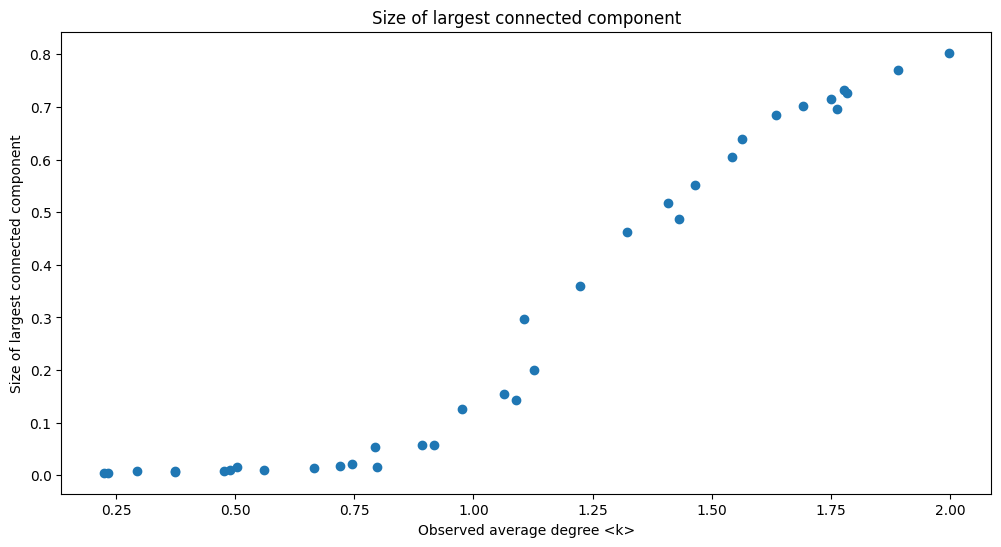

In [35]:
# LEAVE AS-IS

plt.figure(figsize=(12,6))
plt.scatter(average_degrees, largest_cc_sizes)
plt.title("Size of largest connected component")
plt.xlabel("Observed average degree <k>")
plt.ylabel("Size of largest connected component")
plt.show()

1. In theory, the size of the largest connected component should increase when the average degree crosses 1. This is the threshold at which a giant connected component appears.

2. In this particular case we observe the same thing, where the size of the largest connected component is basically zero until the <k>=1 threshold is passed and then the largest cc starts to quickly increase in size.

## 1.3. Degree distributions and Cumulative Degree Distributions

Create another function `print_er_statistics(g,p)` that given an ER graph and a probability *p* prints:

* its observed average degree *&lt;k&gt;*
* its expected average degree given *N* and *p*, using the formula seen in class

You can get a list of *(node, degree)* pairs by invoking `g.degree()`, or ask for the degree of node *u* using `g.degree(u)`.


In [36]:
def print_er_statistics(g, p):
    N = g.number_of_nodes()
    
    # Observed avg degree
    observed_avg_degree = graph_average_degree(g)
    
    # Expected avg degree: <k> = p * (N - 1)
    expected_avg_degree = p * (N - 1)
    
    print(f"--- ER Graph Statistics (N={N}, p={p}) ---")
    print(f"Observed average degree: {observed_avg_degree:.4f}")
    print(f"Expected average degree: {expected_avg_degree:.4f}")
    print()

# generate and test the three ER graphs
N = 500

p_values = [0.01, 0.03, 0.1]
for p in p_values:
    g = generate_random_graph(N, p)
    print_er_statistics(g, p)


--- ER Graph Statistics (N=500, p=0.01) ---
Observed average degree: 4.9640
Expected average degree: 4.9900

--- ER Graph Statistics (N=500, p=0.03) ---
Observed average degree: 15.0720
Expected average degree: 14.9700

--- ER Graph Statistics (N=500, p=0.1) ---
Observed average degree: 49.6720
Expected average degree: 49.9000



You can use the following function (as-is, or modified) to plot the degree distribution in a graph.

In [37]:
# Leave as-is or modify if you want
def plot_degree_distributions(g_list, p_values):
    plt.figure(figsize=(12, 6))

    for g, p in zip(g_list, p_values):
        degree_dict = dict(g.degree())
        degree_sequence = list(degree_dict.values())

        prob, bin_edges = np.histogram(
            degree_sequence,
            bins=range(1, np.max(degree_sequence) + 2),
            density=True
        )

        plt.plot(bin_edges[:-1], prob, 'o-', label=f'p={p}')

    plt.title("Probability Density Function (Degree Distribution)")
    plt.xlabel("Degree")
    plt.ylabel("Probability")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


def plot_cumulative_degree_distributions(g_list, p_values):
    plt.figure(figsize=(12, 6))

    for g, p in zip(g_list, p_values):
        degree_dict = dict(g.degree())
        degree_sequence = list(degree_dict.values())

        degree_counts, bin_edges = np.histogram(
            degree_sequence,
            bins=range(1, np.max(degree_sequence) + 2),
            density=True
        )

        cumulative_distribution = np.cumsum(degree_counts[::-1])[::-1]

        plt.plot(bin_edges[:-1], cumulative_distribution, 'o-', label=f'p={p}')

    plt.title("Cumulative Degree Distribution (P(k' ≥ k))")
    plt.xlabel("Degree (k)")
    plt.ylabel("Cumulative Probability")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


--- ER Graph with p=0.001 ---
Observed average degree     = 1.940
Expected average degree     = 1.999

--- ER Graph with p=0.003 ---
Observed average degree     = 5.985
Expected average degree     = 5.997

--- ER Graph with p=0.01 ---
Observed average degree     = 20.035
Expected average degree     = 19.990

--- ER Graph with p=0.03 ---
Observed average degree     = 60.098
Expected average degree     = 59.970

Degree distribution for p=0.03:


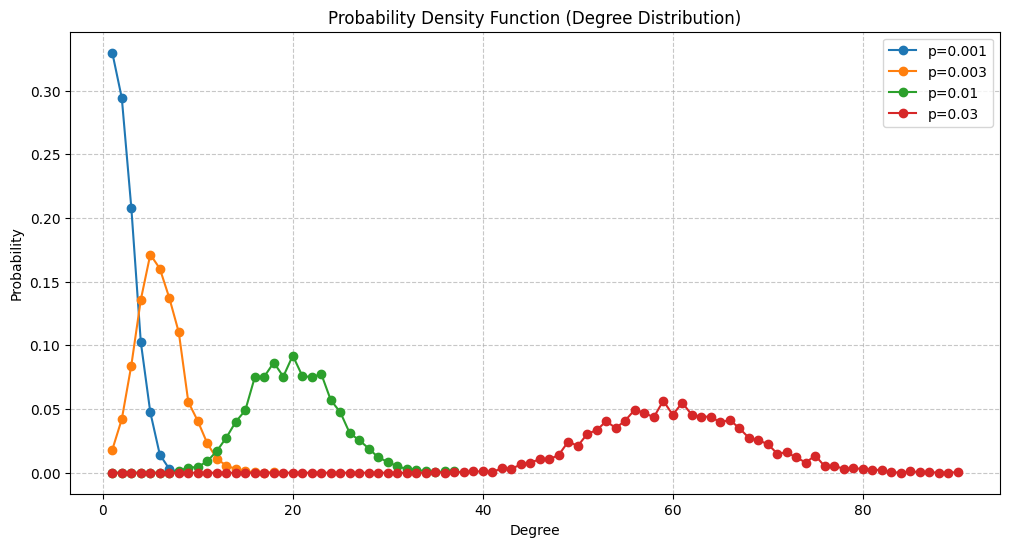

Cumulative degree distribution for p=0.03:


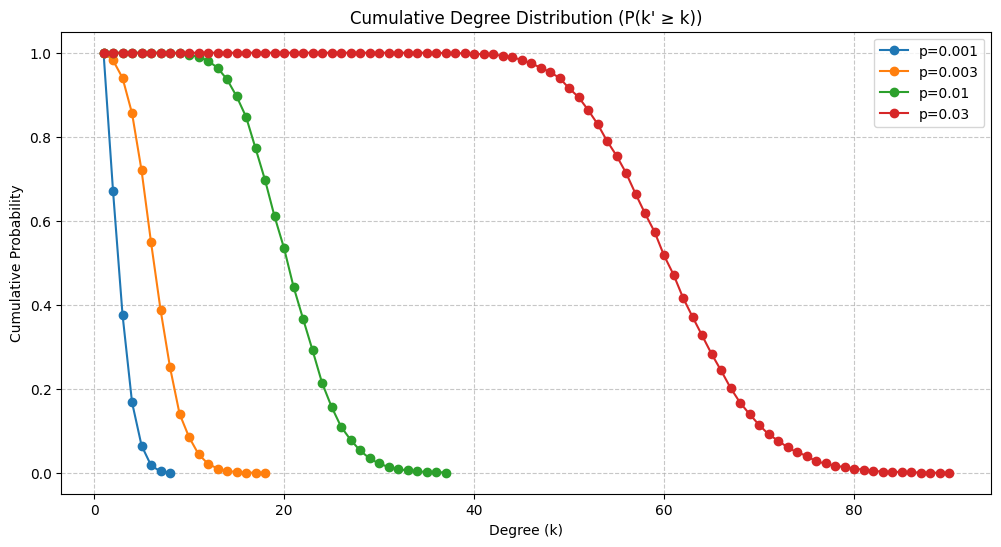

In [38]:
# generate 4 ER graphs with fixed N and different p
N = 2000
p_values = [0.001, 0.003, 0.01, 0.03]   
graphs = []

for p in p_values:
    g = generate_random_graph(N, p)
    graphs.append(g)

    # Compute degrees
    observed_avg_degree = graph_average_degree(g)
    expected_avg_degree = p * (N - 1)

    print(f"--- ER Graph with p={p} ---")
    print(f"Observed average degree     = {observed_avg_degree:.3f}")
    print(f"Expected average degree     = {expected_avg_degree:.3f}")
    print()

# Plot degree distribution
print(f"Degree distribution for p={p}:")
plot_degree_distributions(graphs, p_values)

# Plot cumulative degree distribution
print(f"Cumulative degree distribution for p={p}:")
plot_cumulative_degree_distributions(graphs, p_values)



# 2. Preferential attachment (BA) generator

In [39]:
# LEAVE AS-IS

def select_with_probability(x, m, p):
    return np.random.choice(x, size=m, replace=False, p=p)

The next cell, which you should leave as-is, tests this function.

In [40]:
# LEAVE AS-IS

trials = 1500
vector = ['a', 'b', 'c']
probabilities = [0.75, 0.13, 0.12]

all_selected = []
for i in range(trials):
    selected = select_with_probability(vector, 1, probabilities)[0]
    all_selected.append(selected)

for i, p in zip(vector, probabilities):
    print("Element {:s} was selected {:d} times, expected {:.0f}".format(i, all_selected.count(i), trials*p) )

Element a was selected 1109 times, expected 1125
Element b was selected 202 times, expected 195
Element c was selected 189 times, expected 180


Write code for creating a BA graph.

Start by creating an auxiliary function, `select_targets(g, m)` that selects *m* target nodes in a graph *g*, with probabilities proportional to the degrees of the nodes.

```python
def select_targets(g, m):

    # Check if feasible
    N = g.number_of_nodes()  
    if N < m:
        raise ValueError('Graph has less than m nodes')

    # Compute sum of degree
    sum_degree = 0

    # YOUR CODE HERE: COMPUTE SUM OF DEGREE OF NODES
    if sum_degree == 0:
        raise ValueError('Graph as no edges')

    # Compute probabilities
    probabilities = []
    for (node, degree) in g.degree():
        # YOUR CODE HERE: COMPUTE PROBABILITY OF SELECTING NODE u
        # THEN APPEND IT TO probabilities USING probabilities.append(...)

    # Sample
    selected = select_with_probability(g.nodes(), m, probabilities)

    return selected
´´´

In [41]:
def select_targets(g, m):

    # Check if feasible
    N = g.number_of_nodes()
    if N < m:
        raise ValueError('Graph has less than m nodes')

    # Compute sum of degrees
    sum_degree = sum([deg for (_, deg) in g.degree()])

    if sum_degree == 0:
        raise ValueError('Graph has no edges')

    # Compute probabilities proportional to degree
    probabilities = []
    for (node, degree) in g.degree():
        prob = degree / sum_degree   # P(node) = deg(node) / Σ deg
        probabilities.append(prob)

    # Sample target nodes
    selected = select_with_probability(list(g.nodes()), m, probabilities)

    return selected


Now, create a function `generate_preferential_attachment_graph(N, m0, m)` that:

1. Checks that *m <= m0* or raises a ValueError
1. Creates an empty graph
1. Adds nodes numbered from *0* to *m<sub>0</sub> - 1* to the graph
1. Creates a cycle by linking node *0* to node *1*, node *1* to node *2*, ..., node *m<sub>0</sub>-1* to node *0*
1. For every node *u* numbered from *m<sub>0</sub>* to *N - 1*
   1. Select *m* targets for this node using `select_targets`
   1. Add node *u* (remember to select targets **before** adding the node *u*)
   1. Link each node *u* to each of the *m* targets
1. Returns the graph

To test your code, you can do small experiments with, e.g., *N=100, m<sub>0</sub>=5, m=5* or *N=500, m<sub>0</sub>=2, m=1*, but do not include these small experimens with your deliverable.


In [42]:
def generate_preferential_attachment_graph(N, m0, m):
    # just making sure the input makes sense
    if m > m0:
        raise ValueError("m must be <= m0")
    if m0 < 1:
        raise ValueError("m0 has to be at least 1")
    if N < m0:
        raise ValueError("N must be >= m0")

    # starting with an empty graph
    G = nx.Graph()

    # adding the first m0 nodes
    G.add_nodes_from(range(m0))

    # connecting them in a simple cycle so everyone has degree at least 1
    for i in range(m0):
        G.add_edge(i, (i + 1) % m0)

    # now we add the rest of the nodes, one by one
    for u in range(m0, N):
        # picking m target nodes based on degree (preferential attachment)
        targets = select_targets(G, m)

        # now we actually add the new node
        G.add_node(u)

        # and connect it to the chosen targets
        for t in targets:
            G.add_edge(u, int(t))

    # all done
    return G


In [43]:
# Leave as is
def estimate_alpha_mle(degrees, k_min=1):
    degrees = np.array(degrees)
    degrees = degrees[degrees >= k_min]
    n = len(degrees)
    alpha = 1 + n / np.sum(np.log(degrees / (k_min - 0.5)))
    return alpha

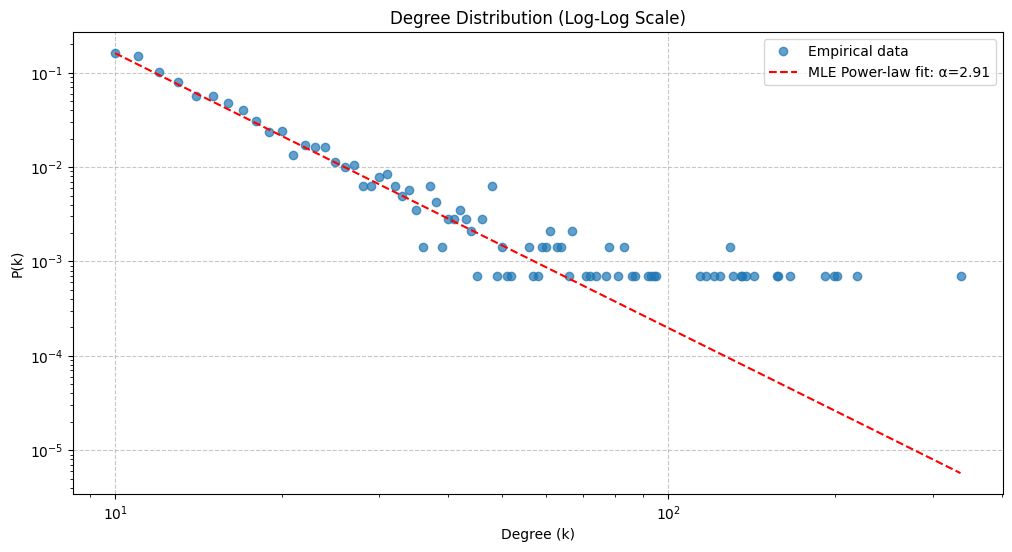

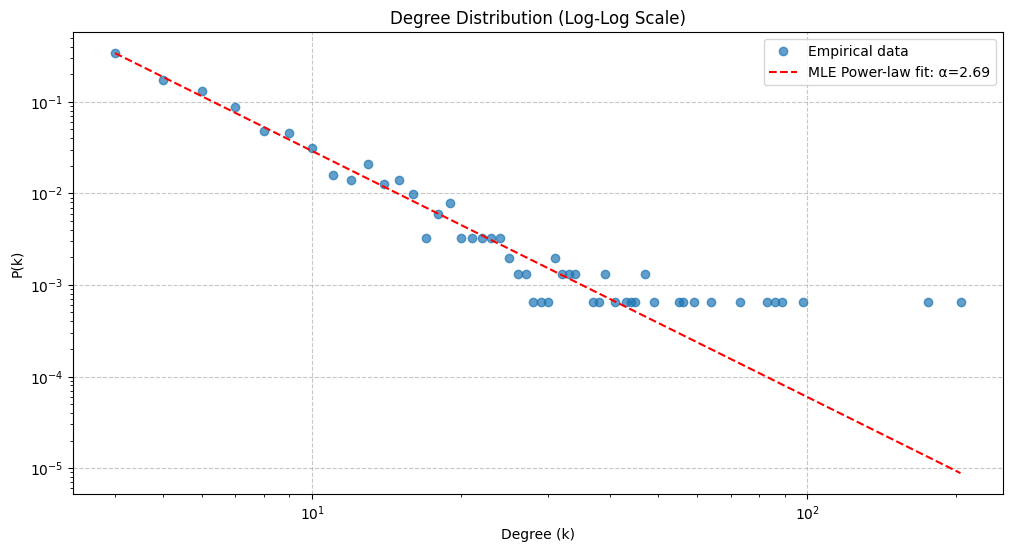

In [44]:
def plot_degree_distribution_loglog(g, k_min=1):
    degree_dict = dict(g.degree())
    degree_sequence = np.array(list(degree_dict.values()))
    degree_sequence = degree_sequence[degree_sequence >= k_min]
    
    # Compute empirical histogram
    prob, bin_edges = np.histogram(
        degree_sequence,
        bins=range(k_min, np.max(degree_sequence)+2),
        density=True
    )
    
    x = bin_edges[:-1]
    y = prob
    
    # Remove zeros (log scale)
    mask = y > 0
    x = x[mask]
    y = y[mask]
    
    # Estimate alpha using MLE
    alpha = estimate_alpha_mle(degree_sequence, k_min)
    
    # Compute fitted power-law line, normalized to first empirical point
    C = y[0] * (x[0] ** alpha)
    y_fit = C * x**(-alpha)
    
    # Plot
    plt.figure(figsize=(12,6))
    plt.loglog(x, y, 'o', alpha=0.7, label='Empirical data')
    plt.loglog(x, y_fit, '--', color='red', label=f'MLE Power-law fit: α={alpha:.2f}')
    
    plt.xlabel("Degree (k)")
    plt.ylabel("P(k)")
    plt.title("Degree Distribution (Log-Log Scale)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

    # first BA graph
g1 = generate_preferential_attachment_graph(5000, m0=5, m=5)
plot_degree_distribution_loglog(g1, k_min=2*5)

# second BA graph
g2 = generate_preferential_attachment_graph(5000, m0=3, m=2)
plot_degree_distribution_loglog(g2, k_min=2*2)



The expected value of alpha in an ideal BA model is 1 because that means the model is defined in a way that the new nodes attach linearly proportional to the degree, which is what produces the characteristic hubs of the scale-free network with y=3.

# 3. ER and BA graph Comparison

In [45]:
#Leave as is
def plot_degree_distribution(g):
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.figure(figsize=(12,6))
    plt.loglog(bin_edges[:-1], prob, 'o-')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.autoscale(enable=True, axis='both')
    plt.show()

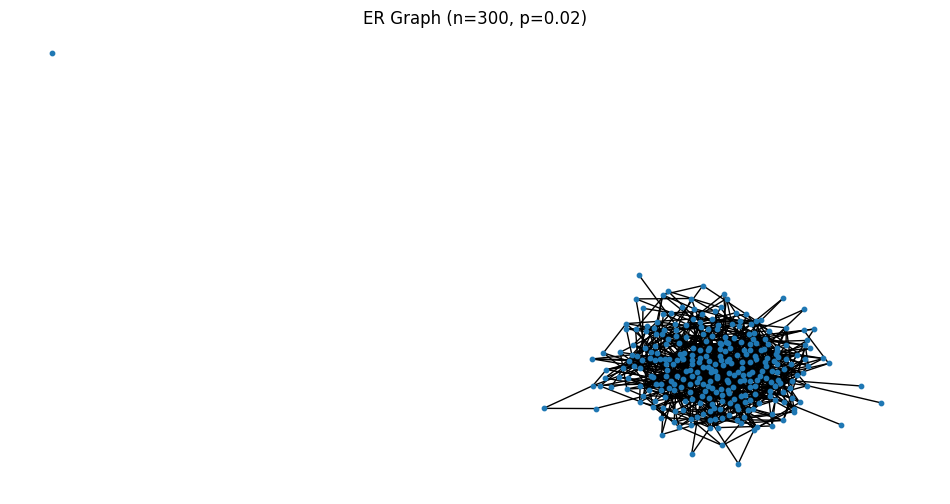

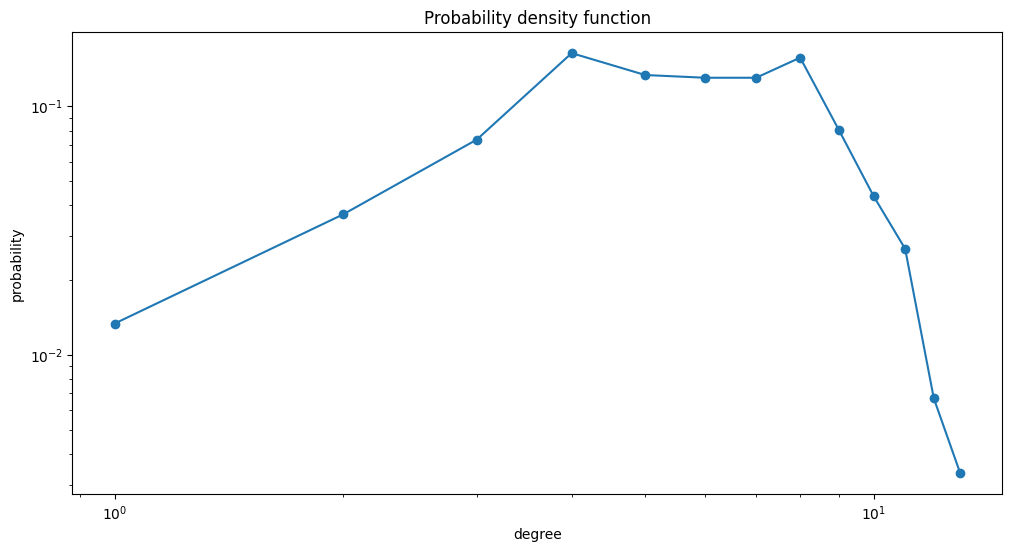

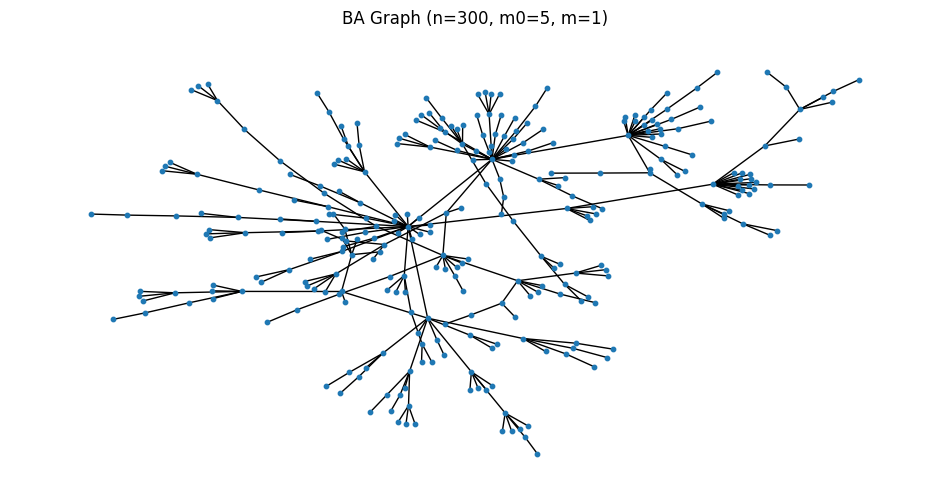

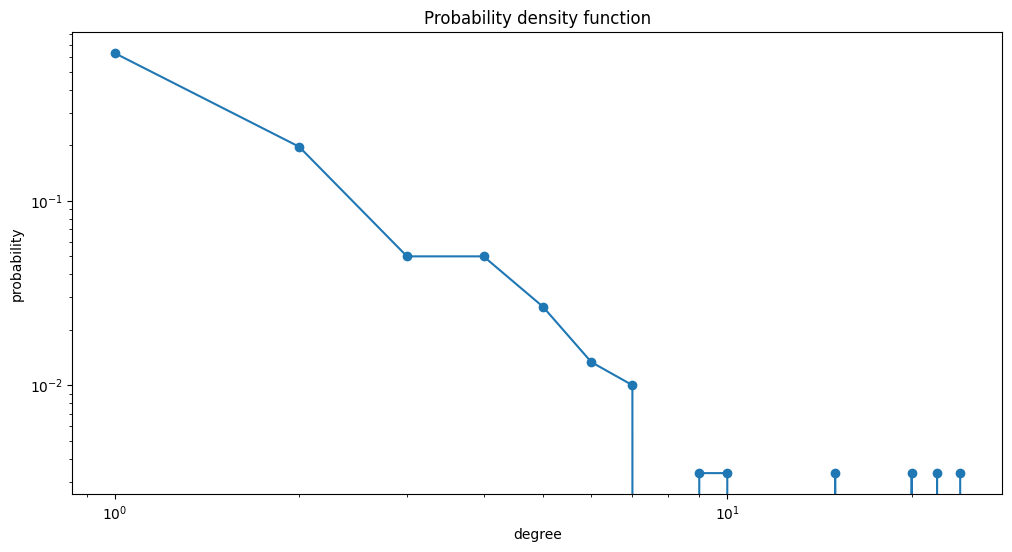

In [46]:
n = 300

# ER graph
p = 0.02
g_er = nx.erdos_renyi_graph(n, p)

# BA graph
m0 = 5
m = 1
g_ba = nx.barabasi_albert_graph(n, m)

# Draw ER graph
plt.figure(figsize=(12,6))
plt.axis('off')
pos = nx.spring_layout(g_er)
nx.draw_networkx(g_er, pos, with_labels=False, node_size=10)
plt.title("ER Graph (n=300, p=0.02)")
plt.show()

# Plot ER degree distribution
plot_degree_distribution(g_er)

# Draw BA graph
plt.figure(figsize=(12,6))
plt.axis('off')
pos = nx.spring_layout(g_ba)
nx.draw_networkx(g_ba, pos, with_labels=False, node_size=10)
plt.title("BA Graph (n=300, m0=5, m=1)")
plt.show()

# Plot BA degree distribution
plot_degree_distribution(g_ba)


1. The two networks have drastically different structures. The first one has a core-periphery structure where (logically) the highly connected nodes are towards the center of the diagram and then they get slighlty less connected as you approach the periphery of the network but without being leaves to a hub, because i can only see one node with degree 1. The BA graph is a network characterised by hubs and leaves. A lot of nodes surrounding a central node, with many of these instances across the network. 

2. Since the ER graph has an even degree distribution, the degree distribution function follows a shape similar to that of a bell curve. Where most of the nodes have a degree close to an average value, with a few highly connected and poorly connected nodes. The plot came out funny for the BA network, but if the visible points were connected we would see the characteristic "long tail" of scale-free networks. It decays exponentially, since most of the nodes have degree one and few nodes have a high degree.


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>